# Principal Component Analysis-Unsupervised

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# We will use the sklearn library's breast cancer dataset. Although our data is labeled data, we will only use features.

In [3]:
X=pd.DataFrame(cancer.data, columns=cancer.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X.shape

(569, 30)

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [7]:
pd.DataFrame(cancer.target).value_counts()

#1 benign tumor
# 0 malignant tumor

1    357
0    212
Name: count, dtype: int64

In [8]:
y = pd.Series(cancer.target).map({0: 1, 1: 0})
y.head()

# Since I will only use labels for comparison in crosstab, ARI score and visualization at the last stage,
# I also assign my label column to the y variable.

# We make our target class 1 as usual.

0    1
1    1
2    1
3    1
4    1
dtype: int64

## PCA with sklearn

## Scaling Data

In [9]:
from sklearn.preprocessing import StandardScaler

# It is important to use StandardScaler in PCA.
# The data used to calculate the PCA need to be normalized.
# In this case: zero means unit variance. This is basically sklearn's StandardScaler.
# Min-Max scalers lack unit variance. Because of that it is a better option is to use
# StandardScaler to avoid breaking the PCA algorithm.

In [10]:
scaler = StandardScaler()

In [11]:
scaled_X = scaler.fit_transform(X)

In [12]:
X_scaled_df = pd.DataFrame(scaled_X, columns=X.columns)
X_scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


<Axes: >

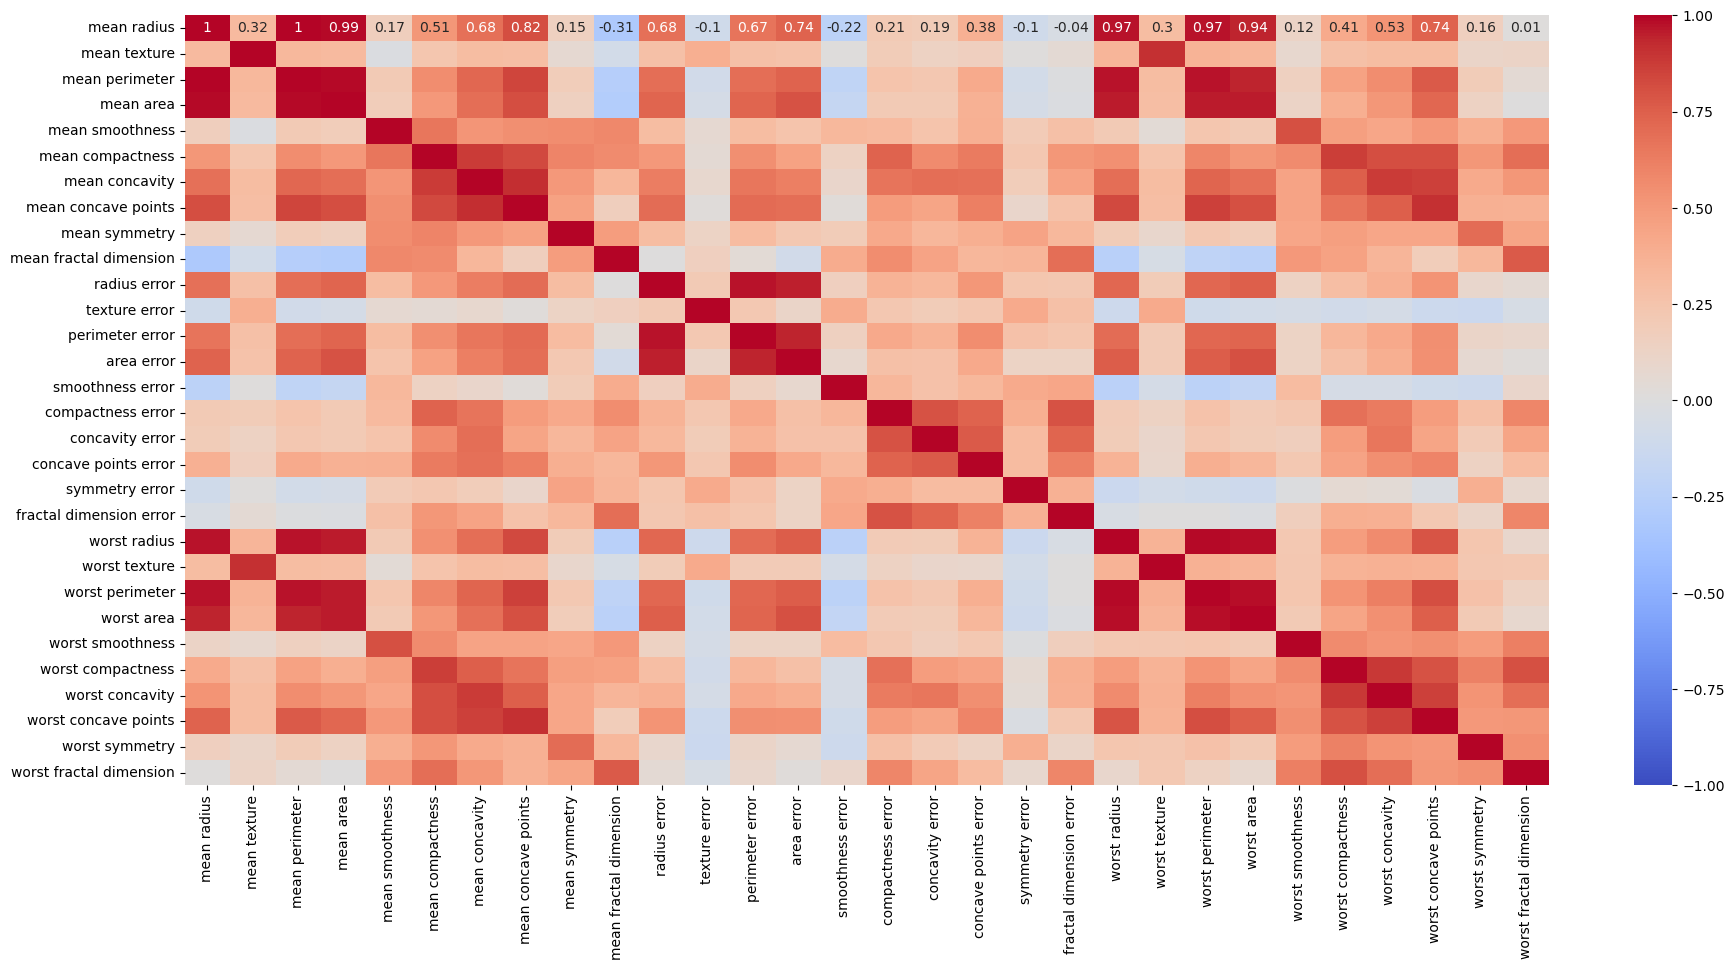

In [13]:
plt.figure(figsize=(22, 10))
sns.heatmap(X_scaled_df.corr().round(2), vmin=-1, vmax=1, annot=True, cmap="coolwarm")

# PCA algorithm will work much better if there are meaningful correlations between features.
# PCA also takes care of the multicollinearity issue.
# High corr with each other. or features with a meaningful corr relationship are more intensely
# combined in the same component.
# In all the new componets we will achieve in PCA, more or less, all the features will surely contribute.

## PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)

# n_component is None by default. Whichever the number of features or rows in our data is less,
# PCA creates a maximum of that number of components.

# We define 2 components to exemine the working logic of PCA.

In [16]:
principal_components = pca.fit_transform(scaled_X)

# With the fit method, eigen vectors are determined for each component as much as
# the number of feature/rows in our data, whichever is less. With the transform method,
# the eigenvectors and the feature values of each observation are multiplied and
# added together to obtain components.
# The number of components we specify as n_componenets is returned.

In [17]:
component_X = pd.DataFrame(data=principal_components,
                           columns=["first_component", "second_component"])
component_X

# We named our components to make them more readable.

,first_component,second_component
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


## Eigenvalues & Eigenvectors

In [18]:
#Eigenvectors
pca.components_

# componenet_ returns the number of eigenvectors we specify in n_componenets.

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [19]:
eigenvectors_first_component = pca.components_[0]
eigenvectors_first_component

# we draw our first eigenvector. Returns the total number of features.
# These values show how much each feature contribute to the first component we acquire.

# example: our first feature contribute 0.22 to the first compoene, while our 2nd feat contribute 0.1

array([0.21890244, 0.10372458, 0.22753729, 0.22099499, 0.14258969,
       0.23928535, 0.25840048, 0.26085376, 0.13816696, 0.06436335,
       0.20597878, 0.01742803, 0.21132592, 0.20286964, 0.01453145,
       0.17039345, 0.15358979, 0.1834174 , 0.04249842, 0.10256832,
       0.22799663, 0.10446933, 0.23663968, 0.22487053, 0.12795256,
       0.21009588, 0.22876753, 0.25088597, 0.12290456, 0.13178394])

In [20]:
eigenvectors_second_component = pca.components_[1]
eigenvectors_second_component

array([-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
        0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
       -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
        0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
       -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
        0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947])

In [21]:
X_scaled_df.loc[0]

# We get all feature values of the first observation in our data.

mean radius                1.097064
mean texture              -2.073335
mean perimeter             1.269934
mean area                  0.984375
mean smoothness            1.568466
mean compactness           3.283515
mean concavity             2.652874
mean concave points        2.532475
mean symmetry              2.217515
mean fractal dimension     2.255747
radius error               2.489734
texture error             -0.565265
perimeter error            2.833031
area error                 2.487578
smoothness error          -0.214002
compactness error          1.316862
concavity error            0.724026
concave points error       0.660820
symmetry error             1.148757
fractal dimension error    0.907083
worst radius               1.886690
worst texture             -1.359293
worst perimeter            2.303601
worst area                 2.001237
worst smoothness           1.307686
worst compactness          2.616665
worst concavity            2.109526
worst concave points       2

In [22]:
(X_scaled_df.loc[0] * eigenvectors_first_component).sum()

# When we multiply the eigen vector of the first component
# and all the feature values of the first observation,
# we get the first component value for the observation in the first line.

9.192836826213243

In [23]:
(X_scaled_df.loc[0] * eigenvectors_second_component).sum()

# When we multiply the eigen vector of the second component
# and all the feature values of the first observation,
# we get the second component value for the observation in the first line.

1.9485830707787786

In [24]:
component_X.head()

,first_component,second_component
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [25]:
pca.explained_variance_ #Eigenvalues
# The explained_variance_ code shows us the eigenvalues that is
# how much information the relevant components carry on it.
# A component with a large value means it carries more information.

array([13.30499079,  5.7013746 ])

## Corr between components

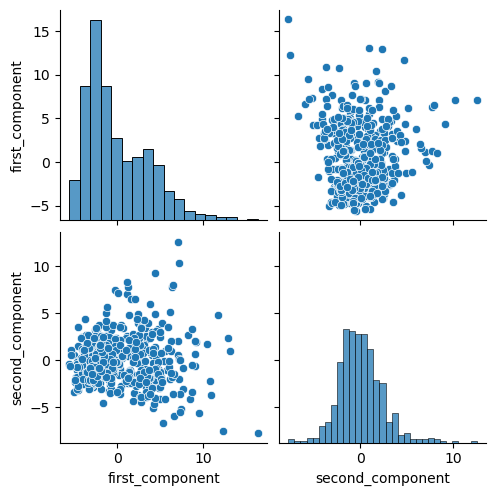

In [26]:
sns.pairplot(component_X)

# When we look at the distribution of our new components via pairplot,
# we can see that there is no significant relationship between them.

<Axes: >

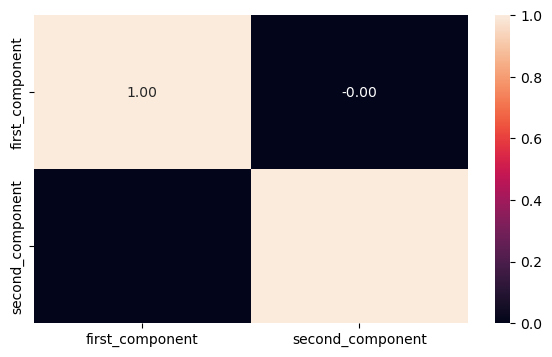

In [27]:
sns.heatmap(component_X.corr(), annot=True, fmt=".2f")

# Their correaltions also 0.

## Finding optimal number of components

In [28]:
pca.explained_variance_

array([13.30499079,  5.7013746 ])

In [29]:
pca.explained_variance_ratio_

# Shows how much of the information they carry on the whole data proportionally.

array([0.44272026, 0.18971182])

In [30]:
pca.explained_variance_ratio_.cumsum()

# shows cumulative totals.

array([0.44272026, 0.63243208])

Text(0, 0.5, 'Variance Ratio')

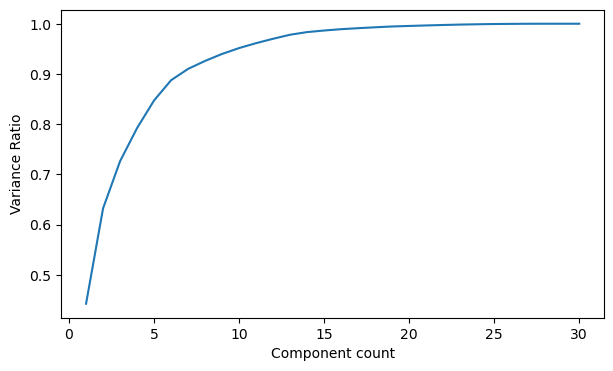

In [31]:
x = range(1,31)
pca = PCA().fit(scaled_X)
plt.plot(x, pca.explained_variance_ratio_.cumsum())
# plt.plot rearranges PCA's n_components hyper_parameter to n_components=x
# for each x value and calculates how much information the components carry
# on them in total for all values x will take up to 1, 2, 3 .......30
# Returns cumulative totals with representation.
plt.xlabel("Component count")
plt.ylabel("Variance Ratio")

# Compenet number corresponding to the range of 75%-90% is preferred as best practice.
# However, for unsupervised models, if there are significant corr relationships between
# the features in your data, rates below 75%-90% can be tried and the results can be checked.
# For supervised models, if there are significant corr relationships between features or
# if you have very strong features, rates below 75%-90% can be tried and the results can be checked.

In [32]:
pca = PCA(n_components=30).fit(scaled_X)

# Since the number of features in our data is less,
# the maximum number of components we can obtain cannot
# exceed the number of features in our data.
# For this reason, we set n_componenets= 30.

In [33]:
my_dict = {"explained_variance": pca.explained_variance_,
           "explained_variance_ratio": pca.explained_variance_ratio_,
           "cumsum_explained_variance_ratio": pca.explained_variance_ratio_.cumsum()}


In [34]:
df_ev = pd.DataFrame(my_dict, index=range(1,31))
df_ev
# we can see the explained_variance, explained_variance_ratio and cumulative sums of each component on a single df.

,explained_variance,explained_variance_ratio,cumsum_explained_variance_ratio
1,13.304991,0.442720,0.442720
2,5.701375,0.189712,0.632432
3,2.822910,0.093932,0.726364
4,1.984128,0.066021,0.792385
5,1.651633,0.054958,0.847343
6,1.209482,0.040245,0.887588
7,0.676409,0.022507,0.910095
8,0.477456,0.015887,0.925983
9,0.417629,0.013896,0.939879
10,0.351311,0.011690,0.951569


In [35]:
df_ev.explained_variance.sum()
# The sum of explained_variance of all components is always equal to the total number of features.

30.052816901408445

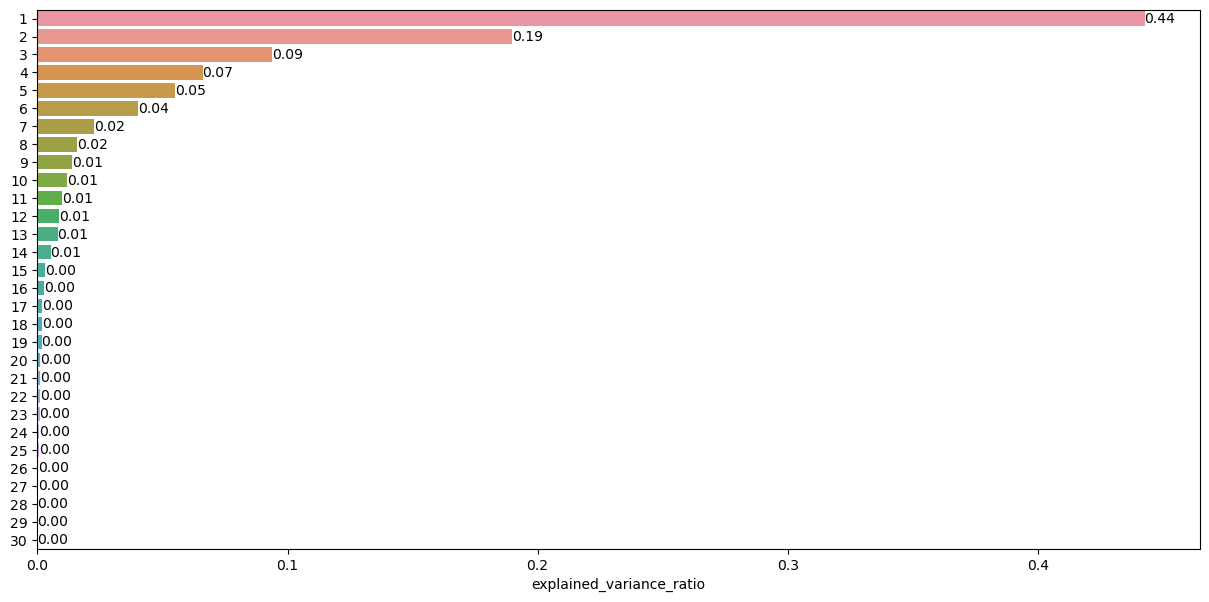

In [36]:
plt.figure(figsize=(15, 7))

ax = sns.barplot(y=df_ev.index,
                 x=df_ev.explained_variance_ratio,
                orient='horizontal')
ax.bar_label(ax.containers[0], fmt="%.2f");

## Built K-Means with  PCA algorithm

In [37]:
pca = PCA(n_components=2)
# We can choose any of the 3 components corresponding to 73% information
# and 6 components corresponding to 89% information. We can decide
# this by checking model scores.

# We may prefer 2 or 3 because of the meaningful correlation between
# our features and to visualize the components that will actually be
# the summary of all my feats.

# We prefer 2 for this data. You can select all 3 and look at the 3D image.

In [38]:
principal_components = pca.fit_transform(scaled_X)
principal_components

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [39]:
component_X = pd.DataFrame(data=principal_components,
                           columns=["first_component", "second_component"])
component_X

,first_component,second_component
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


## K-Means Algorithm

In [40]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [41]:
component_X

,first_component,second_component
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [42]:
hopkins(component_X, 1)
# We can say that our data consisting of new components is
# randomly distributed and has a high tendency to cluster.

0.8557214964098514

In [43]:
from sklearn.cluster import KMeans

ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k,
                   random_state=42)
    model.fit(component_X)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

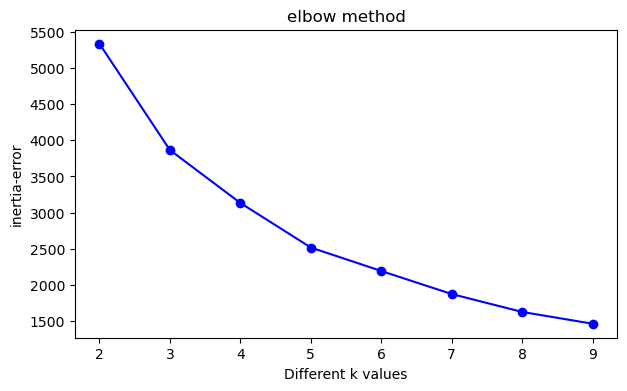

In [44]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [45]:
-pd.Series(ssd).diff()

# we see that the first point where the sharp decline stopped is 3.

0            NaN
1    1468.010290
2     730.927423
3     615.452849
4     324.084231
5     318.154544
6     247.266703
7     162.706117
dtype: float64

In [55]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(component_X)
    distances = kmeanModel.transform(component_X) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

Text(0.5, 1.0, 'elbow method')

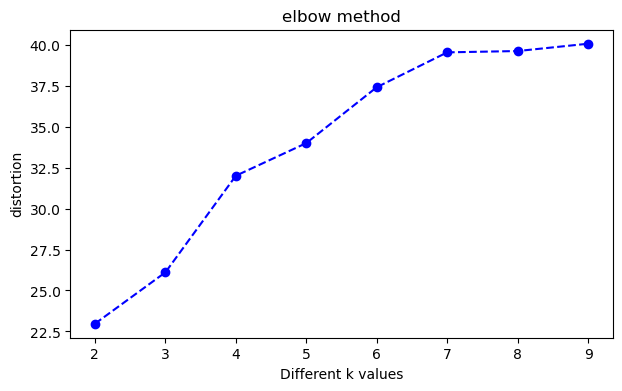

In [47]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

In [48]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(component_X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(component_X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.5084690190674149
For n_clusters=3, the silhouette score is 0.4766724460729728
For n_clusters=4, the silhouette score is 0.4656018483068329
For n_clusters=5, the silhouette score is 0.36344947291661606
For n_clusters=6, the silhouette score is 0.35720646057192346
For n_clusters=7, the silhouette score is 0.36612124050322375
For n_clusters=8, the silhouette score is 0.3726397252182379


<Axes: xlabel='first_component', ylabel='second_component'>

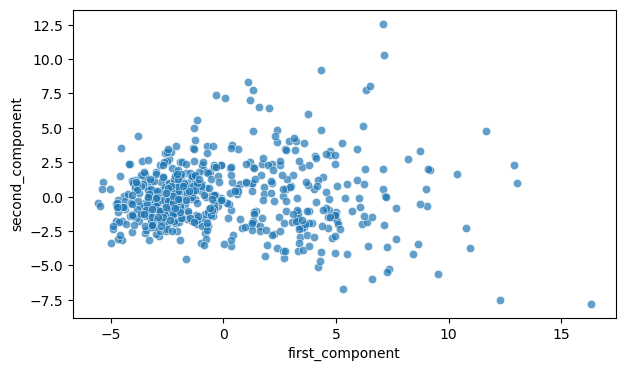

In [49]:
sns.scatterplot(x=component_X.first_component,
                y=component_X.second_component,
                alpha=0.7)
# If we look at the plot of our components below, although the silhouute score
# is high for 2 clusters, the inertia value is also very high and one of the clusters
# spread over a very wide area.

#3 or 4 cluster numbers seem logical. We can choose both.

# As a result of inertia elbow method, distortion elbow method,  the silhoutte score
# and visualization, we have decided that there may be 3 or 4 clusters, and
# we will discuss with the customer for the final decision and make the final decision.
# When meeting with the customer, the customer had the data examined by the specialist
# and said that there were 2 groups in this data: cancer is not cancer.
# In this case, we shelve all the work we have done and continue with 2 clusters.

In [50]:
model = KMeans(n_clusters=2, random_state=42)
clusters = model.fit_predict(component_X)
clusters

# With the help of expert we rebuild our model with 2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [51]:
y
# We asked the customer to label the data for cross-validation with ARI score and crosstab.
# We assume that the customer labels and delivers the data to us.

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Length: 569, dtype: int64

In [52]:
ct = pd.crosstab(y, clusters)
ct

col_0,0,1
row_0,,
0,341,16
1,37,175


In [53]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(y, clusters)

0.6592305570949524

## Visualization of Components

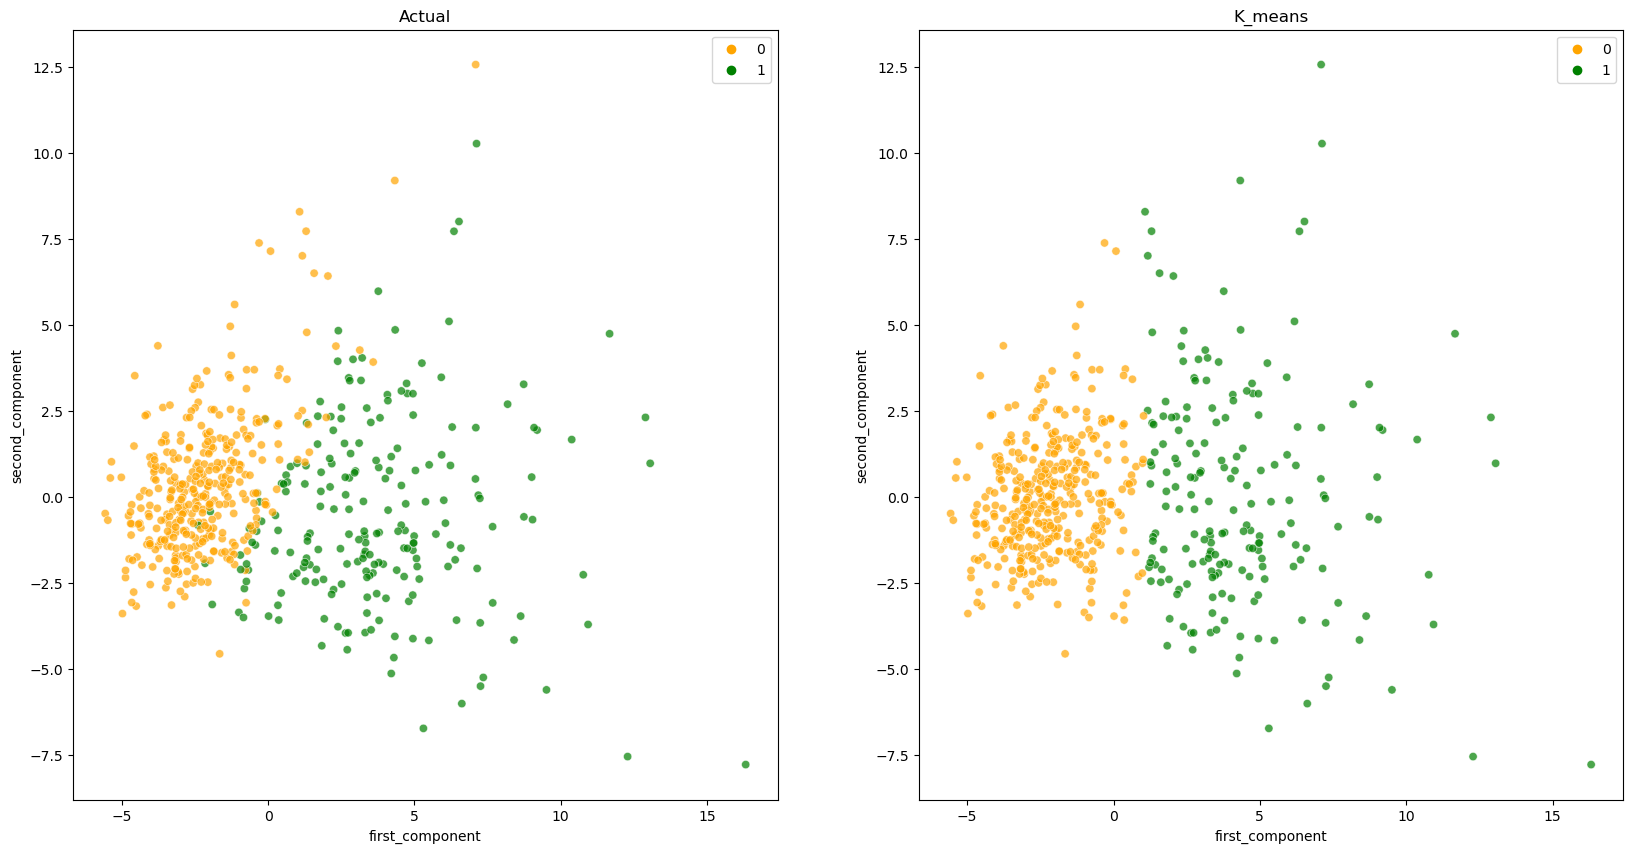

In [54]:
plt.figure(figsize=(20,10))

plt.subplot(121)
sns.scatterplot(x=component_X.first_component,
                y=component_X.second_component,
                hue=y,
                alpha=0.7,
                palette=['orange','green'])
plt.title("Actual")


plt.subplot(122)
sns.scatterplot(x=component_X.first_component,
                y=component_X.second_component,
                hue=clusters,
                alpha=0.7,
                palette=['orange','green'])
plt.title("K_means")
plt.show();

# When the left image made according to the real labels and the right image of
# the clusters predicted by the algorithm are compared, the cluster success
# we have achieved is very satisfactory.

# In addition, the images below are actually a 2-dimensional summary of 30 features.